## To predict the Sales Price a car using RF Regression

In [1]:
# importing the required libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
df = pd.read_csv("E:\Car price\car data.csv")

In [24]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
# "Selling price" is our target variable .

In [25]:
# To dtermine the categorical features and count their unique values :

print(df.Seller_Type.value_counts())
print("---")
print(df.Fuel_Type.value_counts())
print("---")
print(df.Owner.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
---
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
---
0    290
1     10
3      1
Name: Owner, dtype: int64


In [26]:
#  to check for null values :

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [27]:
# To get some information about the numerical features of data .

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [28]:
# to remove the car name variable from the datset.

final_data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [29]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
# To crate a col. "Car_Age" where the year would be sunbtarcted from 2021(curent year) to give the car age.

final_data['Car_age'] = 2021 - final_data.Year

In [31]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [32]:
# To drop the "Year" col.

final_data.drop(['Year'], axis = 1 , inplace = True)
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [33]:
# To convert the categorical values into numerical values : Label encoder from sklearn is used.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
# Applying the label encoder on cat. varaibles :

final_data.Fuel_Type = le.fit_transform(final_data.Fuel_Type)
final_data.Seller_Type = le.fit_transform(final_data.Seller_Type)
final_data.Owner= le.fit_transform(final_data.Owner)
final_data.Transmission = le.fit_transform(final_data.Transmission)

In [35]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_age
0,3.35,5.59,27000,2,0,1,0,7
1,4.75,9.54,43000,1,0,1,0,8
2,7.25,9.85,6900,2,0,1,0,4
3,2.85,4.15,5200,2,0,1,0,10
4,4.60,6.87,42450,1,0,1,0,7


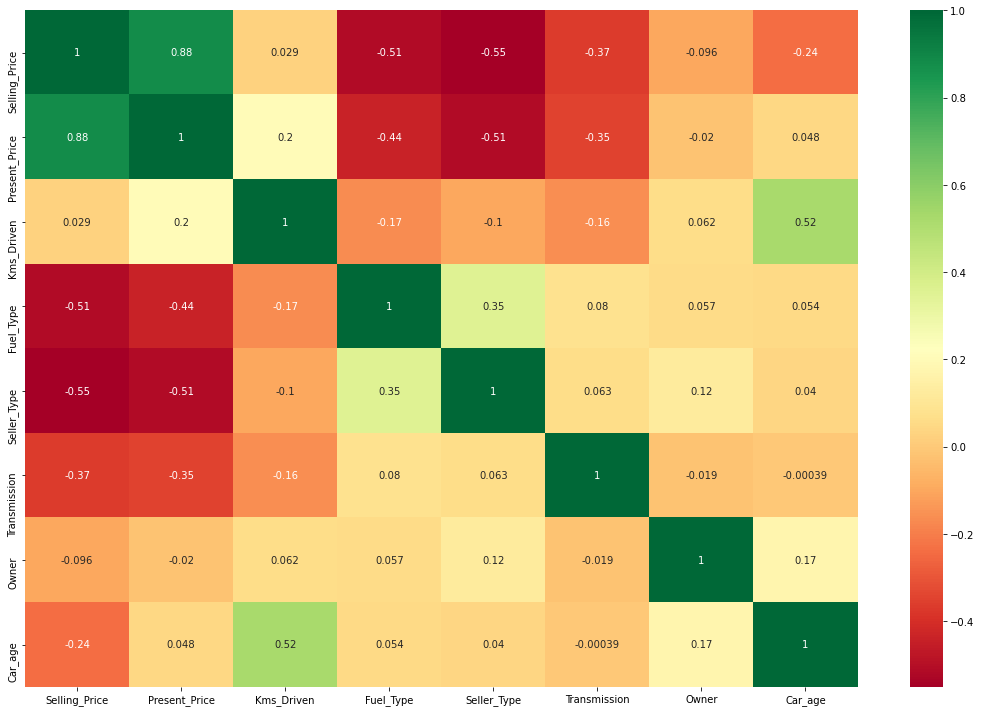

In [45]:
# To find the correlation and plot the correlation values :

corr_mat = final_data.corr()
top_corr_features = corr_mat.index

# To plot the heatmap :

plt.figure(figsize=(15,10))
sb.heatmap(data= final_data[top_corr_features].corr(), annot= True, cmap ="RdYlGn")
plt.tight_layout();

In [49]:
# Divide the independednt and dependent variables :

x = final_data.iloc[:,1:]

y = final_data.iloc[:,0]

In [50]:
print(x.head())

   Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  Owner  \
0           5.59       27000          2            0             1      0   
1           9.54       43000          1            0             1      0   
2           9.85        6900          2            0             1      0   
3           4.15        5200          2            0             1      0   
4           6.87       42450          1            0             1      0   

   Car_age  
0        7  
1        8  
2        4  
3       10  
4        7  


In [48]:
print(y.head())

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64


In [54]:
## Feature Importance : we use the library "Extra Tree Regressor" from "skleran.ensemble"

import sklearn
print(sklearn.__version__)


0.23.2


In [55]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()

In [56]:
# Fitting the model to our data.

model.fit(x,y)

ExtraTreesRegressor()

In [58]:
# to get the feature Importance values :

print(model.feature_importances_)

[0.38238802 0.03865891 0.15608055 0.25434535 0.08839273 0.00063187
 0.07950257]


In [60]:
# To make a Data Frame of col. name and their feature importances :

Col_Feature_Imp = pd.DataFrame({"Col.names": x.columns, "Feature Importance":model.feature_importances_})

In [61]:
Col_Feature_Imp

,Col.names,Feature Importance
0,Present_Price,0.382388
1,Kms_Driven,0.038659
2,Fuel_Type,0.156081
3,Seller_Type,0.254345
4,Transmission,0.088393
5,Owner,0.000632
6,Car_age,0.079503


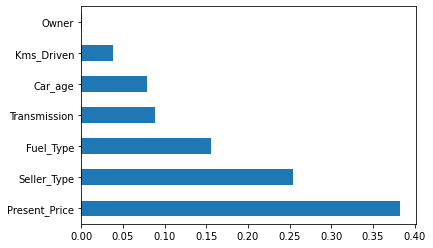

In [65]:
# to plot the graph of feature importance for better visulisation :

feature_importances= pd.Series(model.feature_importances_ , index = x.columns)
feature_importances.nlargest(7).plot(kind="barh")
plt.show();

# From the graph it is clearly visible that "Present Price" has the highest importance.


In [66]:
# Splitting the data into train and test data :

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [67]:
print(x_train.shape)
print(y_train.shape)
print('-----')
print(x_test.shape)
print(y_test.shape)

(210, 7)
(210,)
-----
(91, 7)
(91,)


In [69]:
# importing the "RandomForestRegressor"

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [70]:
## Hyperparameters :

## To select the different no. of "n_estimators" which is the no. of trees.

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [72]:
# Now to select the value for other parameters we use "RandomizedSearchCV" from sklearn.model_selection :

from sklearn.model_selection import RandomizedSearchCV

In [73]:

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [74]:
# Creating the Random Grid of parameters :

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

# For randomized search CV to run , all the parameters shoulkd be given in "key and values" form.

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [75]:
# First intialise the RFRegressor

rf = RandomForestRegressor()

In [76]:
# Applying the randomized search CV :

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [78]:
# fitting the model on train and test data :

rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.0min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
# To Predict the values :

pred_value = rf_random.predict(x_test)
pred_value

array([ 7.10508,  0.5329 ,  4.98068,  8.94704, 15.34718,  5.04075,
        3.40905,  0.75982,  4.8041 ,  4.56475,  3.10053,  0.87823,
        4.92717,  8.01669,  7.88935, 11.47192,  7.4009 ,  4.07142,
        0.50685,  1.48375,  4.18285,  4.63361,  5.74405,  9.72327,
        0.24659,  0.76245,  0.52252,  0.64369,  0.48457,  5.03065,
        4.48586,  5.85835,  0.5243 ,  8.54629,  3.54765,  1.16122,
        5.65716,  6.69614,  0.25193,  8.95795,  8.76141, 19.54755,
        4.90122,  4.11875,  5.4204 , 11.37231,  0.33887,  0.89168,
        5.04065,  7.66415,  7.74529,  3.42352,  4.80895, 21.11155,
        1.09155,  1.07748,  0.48858,  2.74955,  3.575  ,  1.30797,
        4.08536,  8.0916 ,  3.19878, 20.71227,  4.1536 ,  5.58428,
       10.37369,  5.1344 ,  0.53536,  3.01705,  3.35821,  3.0006 ,
        0.63268,  5.43595,  1.15605,  2.81767,  0.50057,  9.27515,
        1.36078,  2.81575,  0.5002 , 10.48701,  6.52315,  5.7117 ,
        5.3336 ,  0.96014,  5.68942,  6.02253,  0.46123,  5.02

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


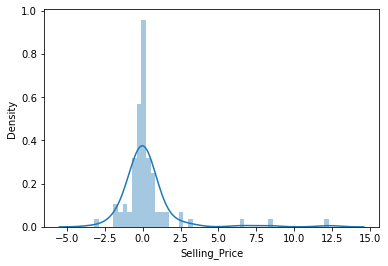

In [82]:
# To compare the Actual(y_test) and predicted(pred_values) :

sb.distplot(y_test - pred_value);

In [83]:
# the above graph shows that the error values are normally distributed.

In [84]:
# To calculate the differennt metrics :

from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_value))
print('MSE:', metrics.mean_squared_error(y_test,pred_value))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_value)))

MAE: 0.857388681318676
MSE: 3.6574851999835105
RMSE: 1.9124552805186088


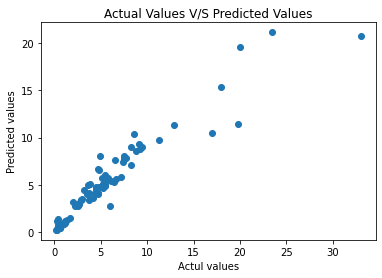

In [87]:
# To plot the scatter plot btw  Actual and Predicted values :

plt.scatter(y_test,pred_value)
plt.xlabel("Actul values")
plt.ylabel("Predicted values")
plt.title("Actual Values V/S Predicted Values");